In [1]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.18/04


In [2]:
f = r.TFile("./sample_data_4.root")

In [3]:
f.cd("islandFits1/fits")
f.ls()

TFile**		./sample_data_4.root	
 TFile*		./sample_data_4.root	
  TDirectoryFile*		islandFits1	islandFits1 (IslandFitDisplayTree) folder
   TDirectoryFile*		fits	fits
    KEY: TTree	fitTree;1	fitTree
   KEY: TDirectoryFile	splines;1	splines
   KEY: TDirectoryFile	fits;1	fits
  KEY: TDirectoryFile	islands;1	islands (CaloIslandAnalyzer) folder
  KEY: TDirectoryFile	islandFits1;1	islandFits1 (IslandFitDisplayTree) folder


In [4]:
tree = f.Get("islandFits1/fits/fitTree")

In [5]:
tree.Print()

******************************************************************************
*Tree    :fitTree   : fitTree                                                *
*Entries :      422 : Total =          124670 bytes  File  Size =      45482 *
*        :          : Tree compression factor =   2.65                       *
******************************************************************************
*Br    0 :caloNum   : caloNum/I                                              *
*Entries :      422 : Total  Size=       2258 bytes  File Size  =        117 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=  15.09     *
*............................................................................*
*Br    1 :xtalNum   : xtalNum/I                                              *
*Entries :      422 : Total  Size=       2258 bytes  File Size  =        591 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.99     *
*...................................................

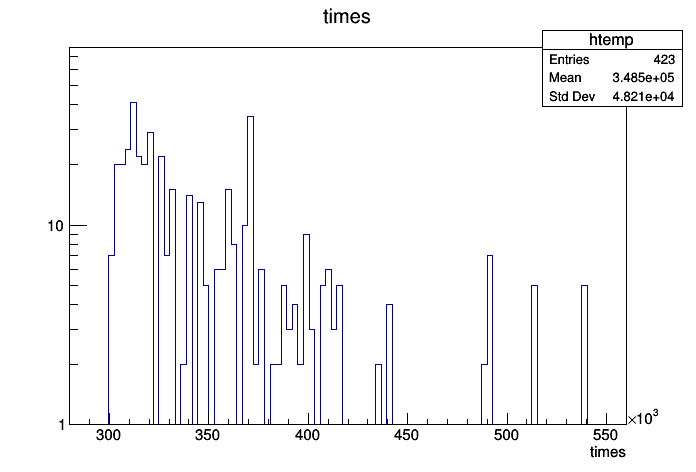

In [6]:
c = r.TCanvas()
tree.Draw("times", "", "colz")
c.SetLogy()
c.Draw()

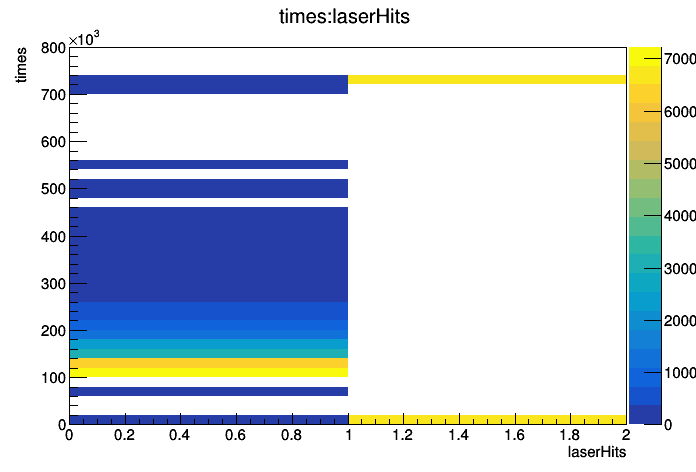

In [29]:
c = r.TCanvas()
tree.Draw("times:laserHits", "", "colz")
c.Draw()

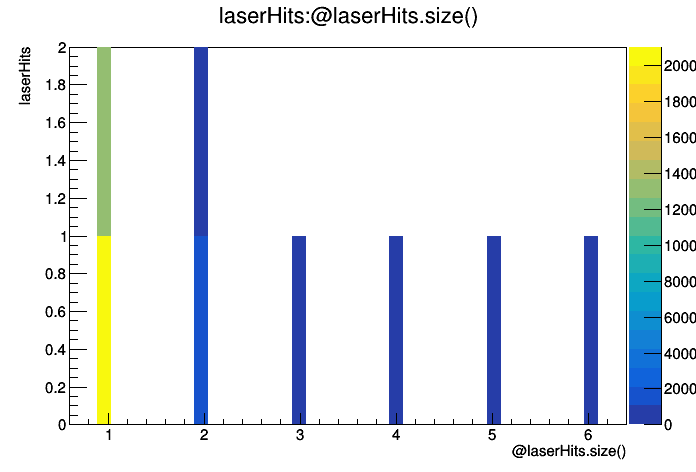

In [30]:
c = r.TCanvas()
tree.Draw("laserHits:@laserHits.size()", "", "colz")
c.Draw()

In [31]:
tree.BuildIndex("laserHits")

276156

In [38]:
bruh = []
for i in range(0, 276156):
    bruh.append(tree.GetEntryWithIndex(i))

(array([2.76154e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -1. ,  23.5,  48. ,  72.5,  97. , 121.5, 146. , 170.5, 195. ,
        219.5, 244. ]),
 <a list of 10 Patch objects>)

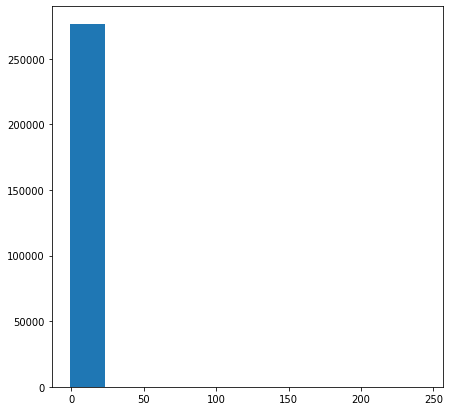

In [43]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

ax.hist(bruh)

### Haha yes uproot exists

In [3]:
import uproot

In [4]:
file = uproot.open("sample_data_4.root")
tree = file["islandFits1/fits/fitTree"]

In [78]:
tree.keys()

[b'caloNum',
 b'xtalNum',
 b'fillNum',
 b'subRunNum',
 b'runNum',
 b'islandNums',
 b'chainedIslandNums',
 b'firstSampleNums',
 b'islandLengths',
 b'chi2',
 b'pedestal',
 b'energies',
 b'times',
 b'statuses',
 b'trace',
 b'laserHits']

In [103]:
traces = tree['trace'].array()
energies = tree['energies'].array()
times = tree['times'].array()
pedestals = tree['pedestal'].array()

bruh_indices = []
print("Looking at energy...")
i = 0
for energy in energies:
    if(len(energy) != 1):
        print("Found bad index {0} with {1} pulses".format(i, len(energy)))
        bruh_indices.append(i)
    i += 1

Looking at energy...
Found bad index 6 with 2 pulses


In [104]:
df = pd.DataFrame(columns=('time','energy','pedestal','trace'))
i = 0
for j in range(0, len(energies)):
    if(j in bruh_indices):
        continue
    
    this_energy = float(energies[j])
    this_trace = np.array(traces[j])
    this_time = float(times[j])
    this_pedestal = float(pedestals[j])
    df.loc[i] = [this_time, this_energy,this_pedestal, this_trace]
    i += 1

In [105]:
df.head()

,time,energy,pedestal,trace
0,327055.691186,190.713001,-1764.531319,"[-1764, -1767, -1761, -1770, -1765, -1763, -17..."
1,327055.387862,87.732285,-1797.883538,"[-1798, -1795, -1800, -1799, -1802, -1796, -18..."
2,327056.264074,2898.905221,-1798.199782,"[-1796, -1795, -1799, -1798, -1802, -1797, -17..."
3,327056.588284,348.623868,-1765.523640,"[-1765, -1764, -1778, -1762, -1767, -1758, -17..."
4,406465.561623,81.521892,-1794.700957,"[-1783, -1797, -1793, -1800, -1793, -1799, -17..."


In [106]:
df.to_csv("sample_data_4.csv")

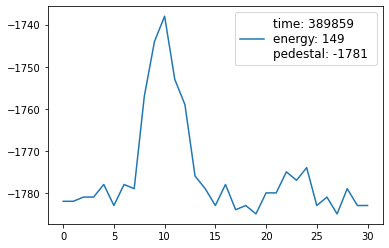

In [112]:
fig, ax = plt.subplots(1,1)

index = 30

stuff = df.loc[index]
thing = \
"time: {0:.0f} \n\
energy: {1:.0f} \n\
pedestal: {2:.0f} \
".format(stuff['time'], stuff['energy'], stuff['pedestal'])

ax.plot(stuff['trace'], label=thing)
ax.legend(fontsize='large')